**This Colab files contains all the cleaning and data processing methodologies applied until now. Refer to each segement separately. The data-set imported here is wm_tweets.csv. It contains around 50k rows**

# Imports and Package Installations

In [ ]:
#This command will help you connect your google drive to this collab notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import csv
import re
import os
import pandas as pd
import numpy as np
import nltk

In [ ]:
import sklearn

In [ ]:
#loading file into dataframe
#click on the folder icon on the left
#Go to the exact csv file and then click on three dots
# select copy path and paste it below, your CSV will open up as a dataframe
path = "/content/drive/My Drive/Dataset/Dataset/wm_tweets_final.csv"
wm_final = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,12,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer

pstem = PorterStemmer()
lem = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

NameError: name 'nltk' is not defined

In [ ]:
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


#word count
from collections import Counter


#sentiment analysis
from textblob import TextBlob


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

In [ ]:
# Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
pip install pyldavis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 17.4MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d9ca324a5d40856ca4d904b378df69ab9e0e76917cebb19c0d414386ddb555d8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8d56545d5bc5aa6eb45a7270f8c435b6f0ec0e0c84a678359b5a4ec1de467e03
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [ ]:
import pyLDAvis.gensim

In [ ]:
#for tweet tokenization
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

# Loading Final Dataset

In [ ]:
#Checking the number of rows in Wealth Management DataFrame
wm_final.shape

(50629, 22)

In [ ]:
wm_final.head()

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,hashtags,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,hapeit,Hugh Perry,51955491,1247671808616280067,/hapeit/status/1247671808616280067,2020-04-07 23:45:14,1586303114,The 15 Best Investing Books of All Time | Weal...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.wealthmanagement.com/people/poll...,[],False,[],NaN,2.0,1.0,0.0,False,False,NaN,[]
1,1,TheChestnutPost,The Chestnut Post,880112324987822082,1247671082288590850,/TheChestnutPost/status/1247671082288590850,2020-04-07 23:42:21,1586302941,Opus Wealth Management Group with $350 Million...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.thechestnutpost.com/news/opus-we...,[],False,[],NaN,0.0,0.0,0.0,False,False,NaN,[]
2,2,BBQHog7000,BBQ Hog 7000,1862195880,1247670786774745089,/BBQHog7000/status/1247670786774745089,2020-04-07 23:41:10,1586302870,Chatham Wealth Management Partners with Local ...,"<p class=""TweetTextSize js-tweet-text tweet-te...","['http://TAPinto.net', 'https://ift.tt/3e3lDuq']",[],False,[],NaN,0.0,0.0,0.0,False,False,NaN,[]
3,3,IAM__Network,IAM Platform,226310002,1247668718043385857,/IAM__Network/status/1247668718043385857,2020-04-07 23:32:57,1586302377,FN’s Trading and Tech Awards 2020: The nominee...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://blog.iammarketingmedia.com/fns-tradi...,"['Bank', 'blockchain', 'Finance', 'FinancialTe...",True,['https://pbs.twimg.com/media/EVCcFkgWAAEyx8S....,NaN,1.0,0.0,0.0,False,False,NaN,[]
4,4,DuisThrivent,Connor Duis,1179406874275438593,1247667977899495424,/DuisThrivent/status/1247667977899495424,2020-04-07 23:30:01,1586302201,"67: If you were born after 1959, this is your ...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],"['financialgudiance', 'financialstrategy', 'fi...",True,['https://pbs.twimg.com/media/EVCbahYU4AMz47z....,NaN,0.0,0.0,0.0,False,False,NaN,[]


In [ ]:
wm_final = wm_final.drop_duplicates(subset = 'text', keep = 'first').reset_index(drop = True)
wm_final.shape

(45472, 22)

In [ ]:
((50629 - 45488)/50629)*100
#10% tweets are duplicated

10.154259416539928

# Data Cleaning Process

This does not include Stemming, Lemmatization, Tokenization or Stop Words Removal

Once this segment is complete please follow the instructions. Make a copy of the tweets dataframe to perform any new analysis. You can choose the add that column seprately to the tweets dataframe prior to this analysis
```
tweets_copy1 = tweets.copy()
tweets_copy2 = tweets.copy()
```

In [ ]:
#convert to lower case
wm_final['text'] = wm_final['text'].str.lower()
wm_final.head()['text']

0    the 15 best investing books of all time | weal...
1    opus wealth management group with $350 million...
2    chatham wealth management partners with local ...
3    fn’s trading and tech awards 2020: the nominee...
4    67: if you were born after 1959, this is your ...
Name: text, dtype: object

In [ ]:
#Allocating a separate Dataframe for the tweet text
tweets = wm_final[["text"]]
tweets.head()
tweets['text'].head()
tweets.shape

(45472, 1)

In [ ]:

# get rid of all kinds of strange symbols from text
def preprocess(Text):
    #Text = Text.str.decode('utf-8')
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\u2066)', ' ')
    Text = Text.str.replace('(\u2069)', ' ')
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    
    #removing twitter images URL
    Text = Text.str.replace('pic.twitter.com', '')
    return Text

In [ ]:
#apply all the preprocess functions
tweets['text'] = preprocess(tweets.text)
tweets.loc[19, 'text']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'sofi acquires galileo as coronavirus can’t stop fintech m&a   read more: https://blog.iammarketingmedia.com/sofi-acquires-galileo-coronavirus-fintechs-merger-acquisitions-software-payments-processing-51586292675/?utm_campaign=twitter&utm_medium=twitter&utm_source=twitter  #bank #blockchain #finance #financialtechnology #fintech #investors #israeli #payments #startupnation #wealthmanagement'

In [ ]:
#Removing urls
tweets = tweets.replace('https?:\/\/.*[\r\n]*', '', regex = True)
tweets['text'][0]

<input>:2: DeprecationWarning:

invalid escape sequence \/

<input>:2: DeprecationWarning:

invalid escape sequence \/

<input>:2: DeprecationWarning:

invalid escape sequence \/

<input>:2: DeprecationWarning:

invalid escape sequence \/

<input>:2: DeprecationWarning:

invalid escape sequence \/

<input>:2: DeprecationWarning:

invalid escape sequence \/

<ipython-input-148-02786bc73cff>:2: DeprecationWarning:

invalid escape sequence \/



'the 15 best investing books of all time | wealth management  @wealth_mgmt '

In [ ]:
#removing hashtags(including the word after #), numbers and twitter handles
#removing random symbols after /
tweets = tweets.replace("[0-9]+", '', regex = True)
tweets = tweets.replace("#[a-zA-Z0-9]+", '', regex = True)
tweets = tweets.replace("@[a-zA-Z0-9]+", '', regex = True)
tweets = tweets.replace("/[a-zA-Z0-9]+", '', regex = True)
tweets['text'][0]


'the  best investing books of all time | wealth management  _mgmt '

In [ ]:
tweets = tweets.replace("[,@!&\;|'-?\.$%_]",'', regex = True)
tweets['text'][0]

<input>:1: DeprecationWarning:

invalid escape sequence \;

<input>:1: DeprecationWarning:

invalid escape sequence \;

<input>:1: DeprecationWarning:

invalid escape sequence \;

<input>:1: DeprecationWarning:

invalid escape sequence \;

<input>:1: DeprecationWarning:

invalid escape sequence \;

<input>:1: DeprecationWarning:

invalid escape sequence \;

<ipython-input-188-7caa06c15e78>:1: DeprecationWarning:

invalid escape sequence \;



'the  best investing books of all time  wealth management  mgmt '

In [ ]:
tweets = tweets.replace("[\\u2018\\u2019]", "'", regex = True)

In [ ]:
##Removing urls
#tweets = tweets.replace('https?:\/\/.*[\r\n]*', '', regex = True)

#text = re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", "", text)

In [ ]:
# Get the lenghth of text and word count
tweets['text_len'] = tweets.text.astype(str).apply(len)
tweets['word_count'] = tweets.text.apply(lambda x: len(str(x).split()))
tweets.head()

,text,text_len,word_count
0,the best investing books of all time wealth ...,63,10
1,opus wealth management group with million in ...,105,15
2,chatham wealth management partners with local ...,83,12
3,fn's trading and tech awards the nominees r...,55,9
4,if you were born after this is your full ret...,64,11


In [ ]:
tweets.text=tweets.text.astype(str)
tweets['text'][0]

'the  best investing books of all time  wealth management  mgmt '

In [ ]:
#dealing with contracted words
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
  def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
    expanded_contraction = first_char+expanded_contraction[1:]
    return expanded_contraction
        
  expanded_text = contractions_pattern.sub(expand_match, text)
  expanded_text = re.sub("'", "", expanded_text)
  return expanded_text

expand_contractions("y'all")

'you all'

In [ ]:
def normalize_corpus(corpus):
  normalized_corpus = []
  
  for doc in corpus:
    doc = expand_contractions(doc)
    normalized_corpus.append(doc)

  return normalized_corpus

In [ ]:
tweets['cleaned'] = pd.Series(normalize_corpus(tweets['text']))

In [ ]:
tweets.head(25)

,text,text_len,word_count,cleaned
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...
3,fn's trading and tech awards the nominees r...,55,9,fns trading and tech awards the nominees re...
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...
5,insights into wealth management,33,4,insights into wealth management
6,while i appreciate the hustle of and counting...,266,54,while i appreciate the hustle of and counting...
7,no its lack of wealth management little do t...,104,17,no its lack of wealth management little do t...
8,mangrove water technologies joins chevron tech...,92,11,mangrove water technologies joins chevron tech...
9,from thrasher 'the consulting model for a rece...,95,16,from thrasher the consulting model for a reces...


In [ ]:
tweets['text'][0]

'the  best investing books of all time  wealth management  mgmt '

Now after this as a rule make a copy of the tweets dataframe to do any further analysis



```
tweets_copy1 = tweets.copy()
tweets_copy2 = tweets.copy()
```

# Removal of StopWords

In [ ]:
tweets_copy1 = tweets.copy()

In [ ]:
#remove stop words
stop_words = stopwords.words('english')
stop_words[0:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
not_stopwords = ['not']
common_words =['please',
               'the','would','could','can','may','must', 'should'
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca', 'wealth', 'management']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
tweets_copy1.cleaned = tweets_copy1.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))
    
tweets_copy1['cleaned'].head(20)

0                        best investing books time mgmt
1     opus group million assets joins level four adv...
2     chatham partners local smoke bbq feed frontlin...
3                 fns trading tech awards nominees read
4                              born full retirement age
5                                              insights
6     appreciate hustle counting folks asked connect...
7             lack little olodo politicians elites know
8     mangrove water technologies joins chevron tech...
9     thrasher consulting model recession new forhir...
10         look bestperforming stocks virus low tuesday
11    covid economic response plan – key points busi...
12    concerned recent market volatility join econom...
13                                  market update today
14    great time guest money savage podcast differen...
15           jack leader others emulate let call action
16    artificial intelligence startups ask dominic c...
17    anxious recent market volatility important

In [ ]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
tweets_copy1.text = tweets_copy1.text.apply(lambda x: rm_punc.sub(' ', x))
tweets_copy1.text = tweets_copy1.text.apply(lambda x: rm_space.sub(' ', x))
tweets_copy1.text = tweets_copy1.text.apply(lambda x: rm_apos.sub(' ', x))
tweets_copy1['cleaned'].head(20)

0                        best investing books time mgmt
1     opus group million assets joins level four adv...
2     chatham partners local smoke bbq feed frontlin...
3                 fns trading tech awards nominees read
4                              born full retirement age
5                                              insights
6     appreciate hustle counting folks asked connect...
7             lack little olodo politicians elites know
8     mangrove water technologies joins chevron tech...
9     thrasher consulting model recession new forhir...
10         look bestperforming stocks virus low tuesday
11    covid economic response plan – key points busi...
12    concerned recent market volatility join econom...
13                                  market update today
14    great time guest money savage podcast differen...
15           jack leader others emulate let call action
16    artificial intelligence startups ask dominic c...
17    anxious recent market volatility important

In [ ]:
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
tweets_copy1.cleaned = tweets_copy1.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))
    
tweets_copy1['cleaned'].head()

0                       best investing books time mgmt
1    opus group million assets joins level four adv...
2    chatham partners local smoke bbq feed frontlin...
3                fns trading tech awards nominees read
4                             born full retirement age
Name: cleaned, dtype: object

In [ ]:
#new column with a stopwords less column
tweets['sw_clean'] = tweets_copy1['cleaned']
tweets.head()

,text,text_len,word_count,cleaned,sw_clean,text_lemmatized
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...,best investing books time mgmt,"[best, investing, book, time, mgmt]"
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...,opus group million assets joins level four adv...,"[opus, group, million, asset, join, level, fou..."
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...,chatham partners local smoke bbq feed frontlin...,"[chatham, partner, local, smoke, bbq, feed, fr..."
3,fns trading and tech awards the nominees re...,55,9,fns trading and tech awards the nominees re...,fns trading tech awards nominees read,"[fns, trading, tech, award, nominee, read]"
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...,born full retirement age,"[born, full, retirement, age]"


Not needed rn

```
wm_new = wm_final.drop(columns = ['text'])
wm_new['text'] = tweets['text']
wm_new = wm_new.drop('Unnamed: 0',axis=1)

wm_final = wm_final.drop(columns = ['text'])
wm_final['text'] = tweets['text']
wm_final = wm_final.drop('Unnamed: 0',axis=1)

wm_new.head()
```



# Lemmatization

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]



tweets['text_lemmatized'] = tweets.sw_clean.apply(lemmatize_text)


In [ ]:
tweets.head()

,text,text_len,word_count,cleaned,sw_clean,text_lemmatized
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...,best investing books time mgmt,"[best, investing, book, time, mgmt]"
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...,opus group million assets joins level four adv...,"[opus, group, million, asset, join, level, fou..."
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...,chatham partners local smoke bbq feed frontlin...,"[chatham, partner, local, smoke, bbq, feed, fr..."
3,fns trading and tech awards the nominees re...,55,9,fns trading and tech awards the nominees re...,fns trading tech awards nominees read,"[fns, trading, tech, award, nominee, read]"
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...,born full retirement age,"[born, full, retirement, age]"


# POS tagging and Sentiment **Labeling**

[Swachh Bharat Sentiment Analysis on Twitter Data](https://towardsdatascience.com/sentiment-analysis-on-swachh-bharat-using-twitter-216369cfa534)

Check out tfidf and sentiment analysis in the above link

In [ ]:
tweets_copy = tweets.copy()
tweets_copy.head()

,text,text_len,word_count,cleaned,sw_clean
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...,best investing books time mgmt
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...,opus group million assets joins level four adv...
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...,chatham partners local smoke bbq feed frontlin...
3,fns trading and tech awards the nominees re...,55,9,fns trading and tech awards the nominees re...,fns trading tech awards nominees read
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...,born full retirement age


In [ ]:
from nltk.tag import pos_tag
from nltk.tag import map_tag

Need to work on this.

In [ ]:
li_swn = []
li_swn_pos = []
li_swn_neg = []
missing_words = []

for i in range(len(tweets_copy.index)):
  text = tweets_copy.loc[i]['sw_clean']
  tokens = nltk.word_tokenize(text)
  tagged_sent = pos_tag(tokens)
  store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]

  pos_total = 0
  neg_total = 0
  for word,tag in store_it:
    if (tag == 'NOUN'):
      tag = 'n'
    elif (tag == 'VERB'):
      tag = 'v'
    elif (tag == 'ADJ'):
      tag = 'a'
    elif (tag == 'ADV'):
      tag = 'r'
    else:
      tag = 'nothing'
    this_word_pos = 0
    this_word_neg = 0
    if (tag!='nothing'):
      concat = word+'.'+tag+'.01'
      try:
        this_word_pos = swn.senti_synset(concat).pos_score()
        this_word_neg = swn.senti_synset(concat).neg_score()
        #print(word,tag,':',this_word_pos,this_word_neg)
      except Exception as e:
        wor = lem.lemmatize(word)
        concat = wor+'.'+tag+'.01'
        # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
        try:
          this_word_pos = swn.senti_synset(concat).pos_score()
          this_word_neg = swn.senti_synset(concat).neg_score()
        except Exception as e:
          wor = pstem.stem(word)
          concat = wor+'.'+tag+'.01'
          # Checking if there's a possiblity of lemmatized word be accepted
          try:
            this_word_pos = swn.senti_synset(concat).pos_score()
            this_word_neg = swn.senti_synset(concat).neg_score()
          except:
            missing_words.append(word)
            continue
    pos_total+=this_word_pos
    neg_total+=this_word_neg
  
  li_swn_pos.append(pos_total)
  li_swn_neg.append(neg_total)

  if (pos_total!=0 or neg_total!=0):
    if (pos_total>neg_total):
      li_swn.append(1)
    else:
      li_swn.append(-1)
  else:
    li_swn.append(0)

tweets_copy.insert(5,"pos_score",li_swn_pos,True)
tweets_copy.insert(6,"neg_score",li_swn_neg,True)
tweets_copy.insert(7,"sent_score",li_swn,True)





In [ ]:
tweets_copy.head()

,text,text_len,word_count,cleaned,sw_clean,pos_score,neg_score,sent_score,pos_score,neg_score,sent_score
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...,best investing books time mgmt,0,0,0,0,0,0
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...,opus group million assets joins level four adv...,0,0,0,0,0,0
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...,chatham partners local smoke bbq feed frontlin...,0,0,0,0,0,0
3,fns trading and tech awards the nominees re...,55,9,fns trading and tech awards the nominees re...,fns trading tech awards nominees read,0,0,0,0,0,0
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...,born full retirement age,0,0,0,0,0,0


# Sentiment Analysis

[Spacy Documentation](https://spacy.io/usage/spacy-101)

In [ ]:
# get the polarity of each text
tweets['polarity'] = tweets.text.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
tweets['sentiment'] = ''
tweets['sentiment'][tweets['polarity'] > 0] = 'positive'
tweets['sentiment'][tweets['polarity'] == 0] = 'neutral'
tweets['sentiment'][tweets['polarity'] < 0] = 'negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tweets.head()

,text,text_len,word_count,date,time,polarity,sentiment
0,best investing books time wealth management mgmt,63,10,2020-04-07,23-45-14,1.00,positive
1,opus wealth management group million assets ma...,105,15,2020-04-07,23-42-21,0.00,neutral
2,chatham wealth management partners local smoke...,83,12,2020-04-07,23-41-10,0.00,neutral
3,fn trading tech awards nominees read,55,9,2020-04-07,23-32-57,0.00,neutral
4,born full retirement age,64,11,2020-04-07,23-30-01,0.35,positive


(0.0, 1000.0)

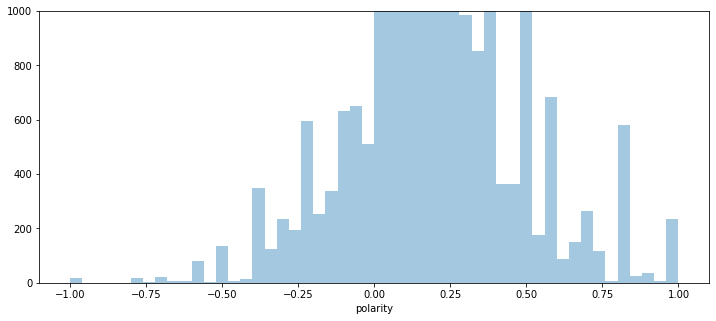

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.distplot(tweets['polarity'],kde = False)
plt.ylim(0, 1000)

In [ ]:
# Sentiment 
tweets.groupby('sentiment').text.count()

sentiment
negative     4195
neutral     23089
positive    18204
Name: text, dtype: int64

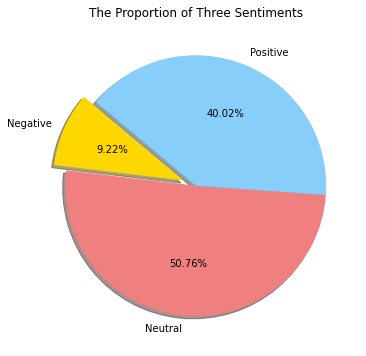

In [ ]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = tweets.groupby('sentiment').text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

In [ ]:
now = wm_new['timestamp'][1]
date_time = now.strftime("%m/%d/%Y")
print("date and time:",date_time)

date and time: 04/07/2020


In [ ]:
#extracting date and time
wm_new['date'] = pd.to_datetime(wm_new['timestamp'], errors='coerce').dt.strftime('%Y-%m-%d')
wm_new['time'] = pd.to_datetime(wm_new['timestamp'], errors='coerce').dt.strftime("%H-%M-%S")


#wm_new['date'] = wm_new['timestamp'].apply( lambda x: x.strftime("%Y-%m-%d"))
#wm_new['time'] = wm_new['timestamp'].apply( lambda x: x.strftime("%H-%M-%S"))
wm_new.drop(['Date'],axis = 1, inplace =True)

wm_new.head()


,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text_html,links,hashtags,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,text,date,time
0,hapeit,Hugh Perry,51955491,1247671808616280067,/hapeit/status/1247671808616280067,2020-04-07 23:45:14,1586303114,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.wealthmanagement.com/people/poll...,[],False,[],NaN,2.0,1.0,0.0,False,False,NaN,[],best investing books time wealth management mgmt,2020-04-07,23-45-14
1,TheChestnutPost,The Chestnut Post,880112324987822082,1247671082288590850,/TheChestnutPost/status/1247671082288590850,2020-04-07 23:42:21,1586302941,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.thechestnutpost.com/news/opus-we...,[],False,[],NaN,0.0,0.0,0.0,False,False,NaN,[],opus wealth management group million assets ma...,2020-04-07,23-42-21
2,BBQHog7000,BBQ Hog 7000,1862195880,1247670786774745089,/BBQHog7000/status/1247670786774745089,2020-04-07 23:41:10,1586302870,"<p class=""TweetTextSize js-tweet-text tweet-te...","['http://TAPinto.net', 'https://ift.tt/3e3lDuq']",[],False,[],NaN,0.0,0.0,0.0,False,False,NaN,[],chatham wealth management partners local smoke...,2020-04-07,23-41-10
3,IAM__Network,IAM Platform,226310002,1247668718043385857,/IAM__Network/status/1247668718043385857,2020-04-07 23:32:57,1586302377,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://blog.iammarketingmedia.com/fns-tradi...,"['Bank', 'blockchain', 'Finance', 'FinancialTe...",True,['https://pbs.twimg.com/media/EVCcFkgWAAEyx8S....,NaN,1.0,0.0,0.0,False,False,NaN,[],fn trading tech awards nominees read,2020-04-07,23-32-57
4,DuisThrivent,Connor Duis,1179406874275438593,1247667977899495424,/DuisThrivent/status/1247667977899495424,2020-04-07 23:30:01,1586302201,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],"['financialgudiance', 'financialstrategy', 'fi...",True,['https://pbs.twimg.com/media/EVCbahYU4AMz47z....,NaN,0.0,0.0,0.0,False,False,NaN,[],born full retirement age,2020-04-07,23-30-01


In [ ]:
tweets['date'] = wm_new.date
tweets['time'] = wm_new.time

In [ ]:
tweets.head()

,text,text_len,word_count,date,time,polarity,sentiment
0,best investing books time wealth management mgmt,63,10,2020-04-07,23-45-14,1.00,positive
1,opus wealth management group million assets ma...,105,15,2020-04-07,23-42-21,0.00,neutral
2,chatham wealth management partners local smoke...,83,12,2020-04-07,23-41-10,0.00,neutral
3,fn trading tech awards nominees read,55,9,2020-04-07,23-32-57,0.00,neutral
4,born full retirement age,64,11,2020-04-07,23-30-01,0.35,positive


Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

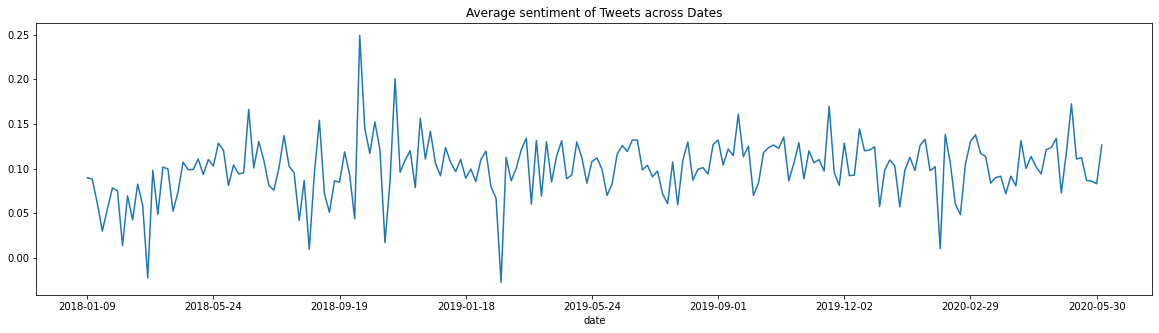

In [ ]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(20,5))
tweets.groupby(['date']).mean()['polarity'].plot()
plt.title('Average sentiment of Tweets across Dates')

#Frequency Analysis

## Tokenization and 1-gram frequency analysis

In [ ]:
tweets.head()

,text,text_len,word_count,cleaned,sw_clean,text_lemmatized
0,the best investing books of all time wealth ...,63,10,the best investing books of all time wealth ...,best investing books time mgmt,"[best, investing, book, time, mgmt]"
1,opus wealth management group with million in ...,105,15,opus wealth management group with million in ...,opus group million assets joins level four adv...,"[opus, group, million, asset, join, level, fou..."
2,chatham wealth management partners with local ...,83,12,chatham wealth management partners with local ...,chatham partners local smoke bbq feed frontlin...,"[chatham, partner, local, smoke, bbq, feed, fr..."
3,fns trading and tech awards the nominees re...,55,9,fns trading and tech awards the nominees re...,fns trading tech awards nominees read,"[fns, trading, tech, award, nominee, read]"
4,if you were born after this is your full ret...,64,11,if you were born after this is your full ret...,born full retirement age,"[born, full, retirement, age]"


In [ ]:
corpus = []
new = tweets['text_lemmatized'].values.tolist()
corpus = [word for i in new for word in i]

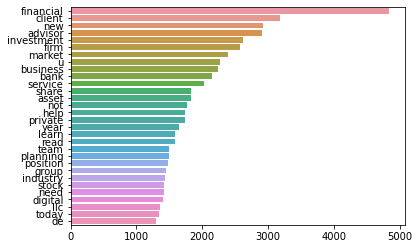

In [ ]:
counter = Counter(corpus)
most = counter.most_common()

x, y= [], []
j, k= [], []

for word,count in most[:30]:
    if (word not in final_stop_words):
            x.append(word)
            y.append(count)
        
for word,count in most[:]:
    if (word not in final_stop_words):
        j.append(word)
        k.append(count)
        
sns.barplot(x = y, y = x)

In [ ]:
combined_frequency = list(zip(j,k))
with open('blank.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','frequency'])
    csv_out.writerows(combined_frequency)

##Bigrams

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:100]

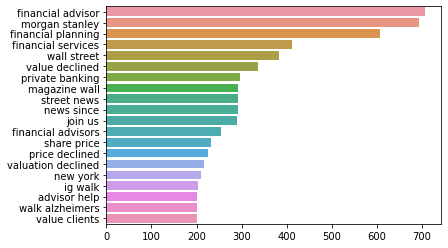

In [ ]:
top_n_bigrams=get_top_ngram(tweets['sw_clean'],2)[:20]
all_n_bigrams=get_top_ngram(tweets['sw_clean'],2)
x,y=map(list,zip(*top_n_bigrams))
j,k=map(list,zip(*all_n_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
phrase_freq = list(zip(j,k))

with open('bi-gram.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['phrase','frequency'])
    csv_out.writerows(phrase_freq)

## Tri-gram

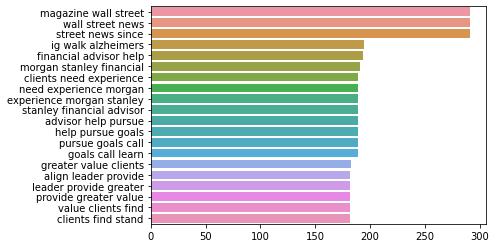

In [ ]:
top_n_trigrams=get_top_ngram(tweets['sw_clean'],3)[:20]
all_n_trigrams=get_top_ngram(tweets['sw_clean'],3)
x,y=map(list,zip(*top_n_trigrams))
j,k=map(list,zip(*all_n_trigrams))
sns.barplot(x=y,y=x)

In [ ]:
phrase_freq = list(zip(j,k))

with open('tri-gram.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['phrase','frequency'])
    csv_out.writerows(phrase_freq)

# Word cloud

In [ ]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(tweets['sw_clean']))): 
    for word in tweets['sw_clean'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 45472/45472 [00:00<00:00, 54671.22it/s]


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()

<Figure size 720x720 with 0 Axes>

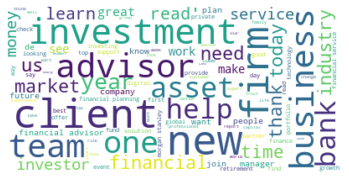

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["wealth","management"])


fig = plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords)
wordcloud.generate(str(set(tweets['sw_clean'])))
#wordcloud.generate(str(set(tweets['text'])))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          #min_font_size=10,  max_font_size=140,
                          #background_color='white',stopwords=set(STOPWORDS),mask = mask)
#wordcloud.generate(str(set(tweets['text'][tweets['sentiment'] == 'positive'])))

<Figure size 720x720 with 0 Axes>

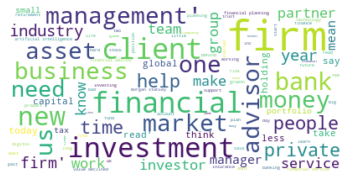

In [ ]:
fig = plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords)
wordcloud.generate(str(set(tweets['text'][tweets['sentiment'] == 'negative'])))
#wordcloud.generate(str(set(tweets['text'])))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
mask = np.array(Image.open(path.join(d,'twitter.png')).convert("RGB"))
color = np.array(Image.open(path.join(d,'color.png')).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
color=np.apply_along_axis(func, 2, color)
def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
color=np.apply_along_axis(func, 2, color)

FileNotFoundError: ignored

In [ ]:
add_stopwords = ['day','like','go','one','today','let','get',
 '2', '1','3','4','5','take','make','think','want','way',
'see','still', 'via', 'now','much', 'even','watch','क',
 'all','really','thing', 'every','around','here','made',
 'also','part','total', 'things',  'little','getting',
 'last','essential','long', 'another', 'look', 'next','there',
 'people','time','new','thank','need','good','going','know',
 'week','everyone','live','love','right','home','us','stay','re',
'help', 'work', 'quarantine', 'life', 'keep', 'york', "york'", 'don']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

# Topic Modeling (Gensim)


## preprocessing

In [ ]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(tweets['text']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')
# 'home', 'stay','new','york', 'time',
# newStopWords =  ['s','t',  'm', 're','don','ve','2', '3', '1', 
#                  'it', 'i', 'us', 'get', 'you', 'let', 'going', 'know', 
#                 'make', 'take', 'still','got', 'can', 'this', 'all', 'me','go',
#                 'even', 'here', 'well', 'much', 'many', 'way', 'want', 'every', 'little']
# stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [ ]:
#we are creating a dictionary from the data, then convert 
#to bag-of-words corpus and save the dictionary and corpus for future use.
from gensim import corpora
dictionary = corpora.Dictionary(data_words)
corpus = [dictionary.doc2bow(text) for text in data_words]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
#find (num_topics) topics in the data
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word = dictionary, passes = 15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words = 5)
for topic in topics:
    print(topic)

(0, '0.035*"raised" + 0.015*"long" + 0.015*"individuals" + 0.013*"bought" + 0.011*"united"')
(1, '0.084*"holding" + 0.022*"era" + 0.018*"bonus" + 0.018*"del" + 0.013*"il"')
(2, '0.082*"position" + 0.049*"inc" + 0.045*"co" + 0.022*"shares" + 0.022*"trimmed"')
(3, '0.026*"industry" + 0.022*"family" + 0.020*"top" + 0.017*"ceo" + 0.015*"years"')
(4, '0.098*"financial" + 0.040*"advisor" + 0.032*"planning" + 0.031*"clients" + 0.030*"services"')
(5, '0.021*"firm" + 0.018*"team" + 0.016*"manager" + 0.015*"service" + 0.014*"financial"')
(6, '0.035*"mutual" + 0.018*"risk" + 0.017*"credit" + 0.016*"northwestern" + 0.016*"commercial"')
(7, '0.072*"stake" + 0.032*"market" + 0.028*"latest" + 0.026*"price" + 0.021*"stock"')
(8, '0.057*"digital" + 0.035*"crypto" + 0.033*"platform" + 0.020*"day" + 0.018*"join"')
(9, '0.098*"llc" + 0.042*"shares" + 0.022*"inc" + 0.015*"lp" + 0.014*"rt"')
(10, '0.026*"get" + 0.024*"money" + 0.020*"time" + 0.018*"know" + 0.017*"make"')
(11, '0.030*"boosted" + 0.015*"billi

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
#Visualizing topics
# Saliency: a measure of how much the term tells you about the topic.
# Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
# The size of the bubble measures the importance of the topics, relative to the data
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

# Topic Modeling (Guided LDA)

[Guided LDA Medium Article](https://github.com/polsci/colab-gensim-mallet/blob/master/topic-modeling-with-colab-gensim-mallet.ipynb)

[GitHub Guided LDA](https://github.com/vi3k6i5/guidedlda/)

[Topic modeling and Visualization of Airline Tweets](http://frickp.github.io/lda-airline-visualization.html)

[Tracking Social issues & Topics in presidential speeches](http://tlfvincent.github.io/2015/10/23/presidential-speech-topics/)

Also refer to GitHub_topic_modelling.ipynb file to understand how tfidf matrix can be used as input to get better topic modeling results. [Here's](https://medium.com/@osas.usen/topic-extraction-from-tweets-using-lda-a997e4eb0985) the link for the medium article related to it.

Some of the possible next steps or alternatives to Guided LDA are listed below with useful resources on each:

1.  [Non-Negative Matrix Factorization](https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/)

2. Visualizing Topic Models using [t-sne method](https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02)

3. [More](https://lvdmaaten.github.io/tsne/) on t-sne



## Preprocessing - Type I

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=100, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(tweets['text']) #.toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf.shape # --> (200000, 2296)

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid escape sequence \w

<input>:2: DeprecationWarning:

invalid 

(45488, 820)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45) # random state for reproducibility
# Fit data to model
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=45, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
model

10

In [ ]:
pip install guidedlda

     |████████████████████████████████| 2.1MB 3.4MB/s 
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev22-cp36-cp36m-linux_x86_64.whl size=2479734 sha256=05cb254d10ad80f6a829a6fdd712f65af36e9de68c62796e99b17db9565b5bea
  Stored in directory: /root/.cache/pip/wheels/cf/cb/c4/95897cbe4e2e12bd01db3c5cb004c744d2cfd68ecc692ce39e
Successfully built guidedlda


In [ ]:
import guidedlda

In [ ]:
vocab = guidedlda.datasets.load_vocab(guidedlda.datasets.NYT)
word2id = dict((v, idx) for idx, v in enumerate(vocab))

In [ ]:
#word2id

# LDA Topic Modeling

[Another LDA Topic Modeling Link](https://github.com/lda-project/lda)

## Preprocessing Type II
[GitHub for Using Mallet on Colab](https://github.com/polsci/colab-gensim-mallet/blob/master/topic-modeling-with-colab-gensim-mallet.ipynb)

### Upgrade gensim

In [ ]:
!pip install --upgrade gensim


     |████████████████████████████████| 24.2MB 151kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### Importing Java

In [3]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

/bin/sh: apt-get: command not found
java version "14.0.1" 2020-04-14
Java(TM) SE Runtime Environment (build 14.0.1+7)
Java HotSpot(TM) 64-Bit Server VM (build 14.0.1+7, mixed mode, sharing)


### Install Mallet

In [4]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

/bin/sh: wget: command not found
unzip:  cannot find or open mallet-2.0.8.zip, mallet-2.0.8.zip.zip or mallet-2.0.8.zip.ZIP.


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

### Lemmatization

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(tweets_copy1['text']))

#remove remaining stop words
data_words = [[word for word in doc if word not in final_stop_words] for doc in data_words]

In [ ]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
  """https://spacy.io/api/annotation"""
  texts_out = []
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
  return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
start=24
limit=32
step=2
random = 155

In [ ]:
#Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random)
                                                 #,random_seed=random
      model.save('model5.lda')
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



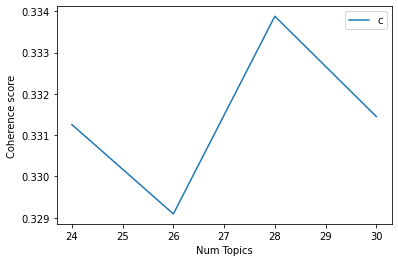

In [ ]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 24  has Coherence Value of 0.3313
Num Topics = 26  has Coherence Value of 0.3291
Num Topics = 28  has Coherence Value of 0.3339
Num Topics = 30  has Coherence Value of 0.3315


#### Finding Key Words for each topic using optimal LdaMallet model

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=30, 
                                             id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)
pprint(sorted(ldamallet.print_topics(num_words=8)))

[(0,
  '0.091*"strategy" + 0.086*"today" + 0.041*"part" + 0.038*"register" + '
  '0.032*"talk" + 0.028*"issue" + 0.028*"hear" + 0.023*"stay"'),
 (1,
  '0.070*"week" + 0.070*"group" + 0.052*"event" + 0.052*"woman" + '
  '0.040*"level" + 0.027*"forward" + 0.024*"talk" + 0.020*"summit"'),
 (3,
  '0.167*"make" + 0.097*"money" + 0.048*"free" + 0.035*"online" + 0.033*"save" '
  '+ 0.027*"thing" + 0.026*"click" + 0.023*"home"'),
 (5,
  '0.283*"financial" + 0.114*"planning" + 0.078*"advice" + 0.029*"investment" '
  '+ 0.027*"professional" + 0.025*"achieve" + 0.023*"offer" + '
  '0.021*"comprehensive"'),
 (6,
  '0.189*"firm" + 0.067*"partner" + 0.045*"senior" + 0.044*"lead" + '
  '0.038*"acquire" + 0.032*"security" + 0.032*"role" + 0.027*"associate"'),
 (7,
  '0.092*"people" + 0.056*"world" + 0.040*"move" + 0.027*"rich" + '
  '0.025*"large" + 0.025*"show" + 0.024*"accord" + 0.022*"wealthy"'),
 (8,
  '0.156*"year" + 0.098*"good" + 0.071*"top" + 0.041*"award" + 0.038*"include" '
  '+ 0.033*"list"

### Visualization using PyLDavis

> [COVID-19 Mental Health Related Sentiment Analysis](https://towardsdatascience.com/how-to-protect-your-mental-health-during-the-covid-19-3840e4015435)



In [ ]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
id2word.save('dictionary.lda')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words = 5)